In [1]:
import numpy
import torch
import torchaudio
torchaudio.set_audio_backend("soundfile")
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\torchaudio\extension\extension.py:13: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')


In [38]:
loadedData = torchaudio.load("a_a_i_a_u_e_a.wav")
tensor = loadedData[0]
sampleRate = loadedData[1]
del loadedData
transformedTensor = torch.stft(tensor, 8129, hop_length = 8129, win_length = 8129, return_complex = True)

In [40]:
backTransformedTensor = torch.istft(transformedTensor, 8129, hop_length = 8129, win_length = 8129, length = 1036800)
torchaudio.save("output.wav", backTransformedTensor, sampleRate, format="wav", encoding="PCM_S", bits_per_sample=32)
difference = backTransformedTensor - tensor
error = difference/tensor
error = error * torch.isfinite(error)
error = torch.nan_to_num(error)

RuntimeError: The size of tensor a (1036448) must match the size of tensor b (1036800) at non-singleton dimension 1

In [41]:
def CauchyDist(height, center, width, location):
    return (height*width) * width/(numpy.power(width, 2) + numpy.power(location-center, 2))

In [59]:
Amplitudes = transformedTensor.abs()
Phases = transformedTensor.angle()
Element = Amplitudes[0].transpose(0,1)[40]
maximum = torch.max(Element, 0)
height = maximum.values.item()
center = maximum.indices.item()

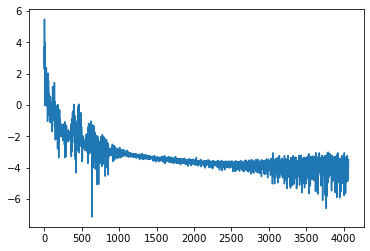

In [60]:
plt.plot(torch.log(Element))

In [50]:
transformedTensor.size()

torch.Size([1, 4065, 128])